In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Assessmentfile1.csv')

In [3]:
df.head()

,customer_id,age,gender,income_bracket,marital_status,education_level,occupation
0,1,56,Other,High,Divorced,Bachelor's,Self-Employed
1,2,69,Female,Medium,Married,PhD,Unemployed
2,3,46,Female,Low,Married,Bachelor's,Self-Employed
3,4,32,NaN,Low,Divorced,Master's,Employed
4,5,60,Female,Low,Divorced,Bachelor's,Employed


In [4]:
df.isnull().sum()

customer_id        0
age                0
gender             6
income_bracket     3
marital_status     0
education_level    3
occupation         5
dtype: int64

In [5]:
# Fill missing values for a specific column with the mode
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['income_bracket'] = df['income_bracket'].fillna(df['income_bracket'].mode()[0])
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])


In [6]:
df.isnull().sum()

customer_id        0
age                0
gender             0
income_bracket     0
marital_status     0
education_level    0
occupation         0
dtype: int64

In [7]:
df[df.duplicated(keep=False)]

,customer_id,age,gender,income_bracket,marital_status,education_level,occupation
0,1,56,Other,High,Divorced,Bachelor's,Self-Employed
1,2,69,Female,Medium,Married,PhD,Unemployed
2,3,46,Female,Low,Married,Bachelor's,Self-Employed
3,4,32,Male,Low,Divorced,Master's,Employed
4,5,60,Female,Low,Divorced,Bachelor's,Employed
5,6,25,Other,Medium,Divorced,Bachelor's,Unemployed
6,7,78,Male,High,Single,Master's,Retired
7,8,38,Other,Low,Married,Master's,Employed
8,9,56,Female,Low,Single,PhD,Self-Employed
9,10,75,Male,Medium,Married,High School,Self-Employed


In [8]:
df = df.drop_duplicates()
df[df.duplicated(keep=False)]

,customer_id,age,gender,income_bracket,marital_status,education_level,occupation


In [10]:
# Calculate Q1, Q3, and IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
outliers

,customer_id,age,gender,income_bracket,marital_status,education_level,occupation
15,16,170,Male,Medium,Divorced,High School,Retired


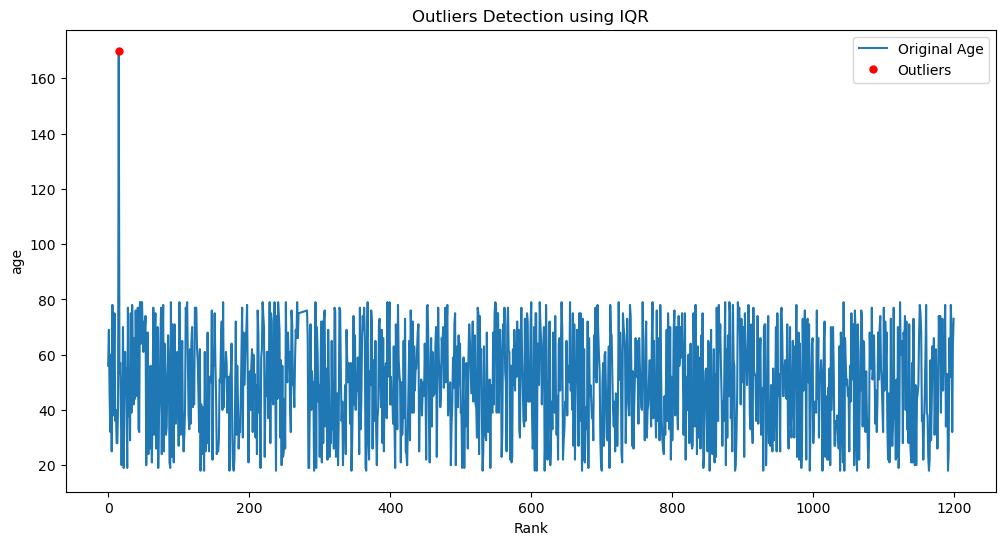

In [11]:
df['outliers_iqr'] = (df['age'] < Q1 - 1.5 * IQR) | \
                                               (df['age'] > Q3 + 1.5 * IQR)

plt.figure(figsize=(12, 6))
plt.plot(df.index, 
         df['age'], 
         label='Original Age')

plt.plot(df[df['outliers_iqr']].index, 
         df[df['outliers_iqr']]['age'], 
         'ro', markersize=5, label='Outliers')

plt.xlabel('Rank')
plt.ylabel('age')
plt.title('Outliers Detection using IQR')
plt.legend()
plt.show()

In [12]:
df= df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
df

,customer_id,age,gender,income_bracket,marital_status,education_level,occupation,outliers_iqr
0,1,56,Other,High,Divorced,Bachelor's,Self-Employed,False
1,2,69,Female,Medium,Married,PhD,Unemployed,False
2,3,46,Female,Low,Married,Bachelor's,Self-Employed,False
3,4,32,Male,Low,Divorced,Master's,Employed,False
4,5,60,Female,Low,Divorced,Bachelor's,Employed,False
...,...,...,...,...,...,...,...,...
1195,1196,78,Female,Low,Single,High School,Retired,False
1196,1197,69,Male,Medium,Single,Master's,Employed,False
1197,1198,32,Male,Medium,Divorced,PhD,Self-Employed,False
1198,1199,64,Other,Medium,Divorced,Bachelor's,Unemployed,False


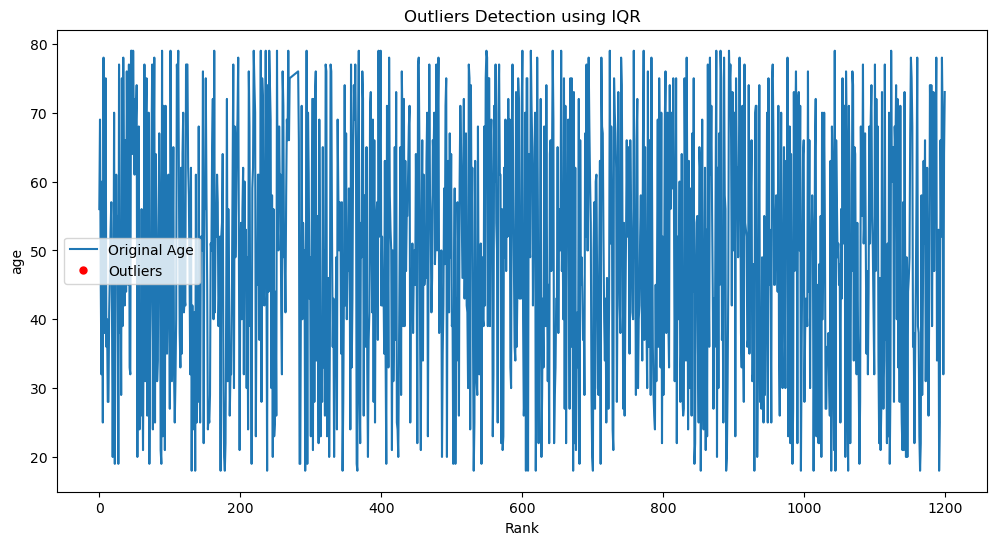

In [13]:
df['outliers_iqr'] = (df['age'] < Q1 - 1.5 * IQR) | \
                                               (df['age'] > Q3 + 1.5 * IQR)

plt.figure(figsize=(12, 6))
plt.plot(df.index, 
         df['age'], 
         label='Original Age')

plt.plot(df[df['outliers_iqr']].index, 
         df[df['outliers_iqr']]['age'], 
         'ro', markersize=5, label='Outliers')

plt.xlabel('Rank')
plt.ylabel('age')
plt.title('Outliers Detection using IQR')
plt.legend()
plt.show()

In [18]:
df.to_csv('clean_data1.csv')

In [24]:
data=pd.read_csv('Assessmentfile2.csv')

In [25]:
data

,customer_id,transaction_id,product_category,quantity,unit_price,payment_method,total_sales,avg_discount_used,after_discount_sales,product_color,product_material
0,1,503290,Electronics,8.0,49.72,Credit Card,397.76,0.02,389.8048,Red,Metal
1,2,347796,Groceries,7.0,817.76,Credit Card,5724.32,0.33,3835.2944,Blue,Metal
2,3,493688,Toys,8.0,270.30,Debit Card,2162.40,0.47,1146.0720,Green,Plastic
3,4,861348,Toys,2.0,547.84,Credit Card,1095.68,0.41,646.4512,Blue,Wood
4,5,535835,Clothing,4.0,785.29,Mobile Payment,3141.16,0.22,2450.1048,Red,Metal
...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,205327,Clothing,3.0,784.99,Debit Card,2354.97,0.04,2260.7712,Red,Metal
1196,1197,161158,Furniture,7.0,43.79,Debit Card,306.53,0.06,288.1382,Blue,Wood
1197,1198,683574,Electronics,1.0,750.89,Debit Card,750.89,0.07,698.3277,Black,Metal
1198,1199,850728,Toys,3.0,922.39,Cash,2767.17,0.01,2739.4983,Green,Glass


In [28]:
data[data.duplicated(keep=False)]

,customer_id,transaction_id,product_category,quantity,unit_price,payment_method,total_sales,avg_discount_used,after_discount_sales,product_color,product_material
273,274,481654,Toys,5.0,87.02,Mobile Payment,435.10,0.35,282.8150,Red,Plastic
274,275,56139,Clothing,9.0,41.84,Credit Card,376.56,0.35,244.7640,Red,Wood
275,276,143722,Clothing,2.0,861.79,Mobile Payment,1723.58,0.49,879.0258,Black,Glass
276,277,482994,Groceries,1.0,600.66,Mobile Payment,600.66,0.50,300.3300,Red,Wood
277,278,561782,Groceries,5.0,678.60,Mobile Payment,3393.00,0.42,1967.9400,White,Wood
278,279,759609,Toys,8.0,124.21,Credit Card,993.68,0.15,844.6280,Green,Metal
279,280,745652,Groceries,5.0,555.02,Mobile Payment,2775.10,0.21,2192.3290,Blue,Plastic
280,281,598338,Clothing,1.0,67.91,Debit Card,67.91,0.48,35.3132,Blue,Metal
281,282,699372,Electronics,1.0,487.30,Debit Card,487.30,0.26,360.6020,Green,Metal
282,283,384922,Furniture,9.0,364.87,Credit Card,3283.83,0.37,2068.8129,Red,Plastic


In [29]:
data = data.drop_duplicates()
data[data.duplicated(keep=False)]

,customer_id,transaction_id,product_category,quantity,unit_price,payment_method,total_sales,avg_discount_used,after_discount_sales,product_color,product_material


In [32]:
data.isnull().sum()

customer_id              0
transaction_id           0
product_category         0
quantity                 7
unit_price               0
payment_method          10
total_sales              6
avg_discount_used        0
after_discount_sales     0
product_color            0
product_material         0
dtype: int64

In [34]:
data['quantity'] = data['quantity'].fillna(data['quantity'].median())
data['payment_method'] = data['payment_method'].fillna(data['payment_method'].mode()[0])
data['total_sales'] = data['total_sales'].fillna(data['total_sales'].mean())

/var/folders/hk/jrmj5krn1m13rs2ldn9zl6q40000gn/T/ipykernel_18614/3466029073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quantity'] = data['quantity'].fillna(data['quantity'].median())
/var/folders/hk/jrmj5krn1m13rs2ldn9zl6q40000gn/T/ipykernel_18614/3466029073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['payment_method'] = data['payment_method'].fillna(data['payment_method'].mode()[0])
/var/folders/hk/jrmj5krn1m13rs2ldn9zl6q40000gn/T/ipykernel_18614/3466029073.py:3: SettingWithCopy

In [38]:
data.isnull().sum()

customer_id             0
transaction_id          0
product_category        0
quantity                0
unit_price              0
payment_method          0
total_sales             0
avg_discount_used       0
after_discount_sales    0
product_color           0
product_material        0
dtype: int64

In [42]:
data.dtypes

customer_id               int64
transaction_id            int64
product_category         object
quantity                float64
unit_price              float64
payment_method           object
total_sales             float64
avg_discount_used       float64
after_discount_sales    float64
product_color            object
product_material         object
dtype: object

In [44]:
# Calculate Q1, Q3, and IQR
Q1 = data['quantity'].quantile(0.25)
Q3 = data['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['quantity'] < lower_bound) | (data['quantity'] > upper_bound)]
outliers


,customer_id,transaction_id,product_category,quantity,unit_price,payment_method,total_sales,avg_discount_used,after_discount_sales,product_color,product_material
19,20,104093,Furniture,30.0,417.57,Debit Card,3758.13,0.10,3382.3170,Blue,Metal
899,900,874421,Clothing,35.0,906.54,Mobile Payment,6345.78,0.01,6282.3222,Blue,Glass
1199,1200,62169,Groceries,40.0,593.01,Debit Card,1779.03,0.21,1405.4337,Blue,Glass


/var/folders/hk/jrmj5krn1m13rs2ldn9zl6q40000gn/T/ipykernel_18614/527252686.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['outliers'] = (data['quantity'] < lower_bound) | (data['quantity'] > upper_bound)


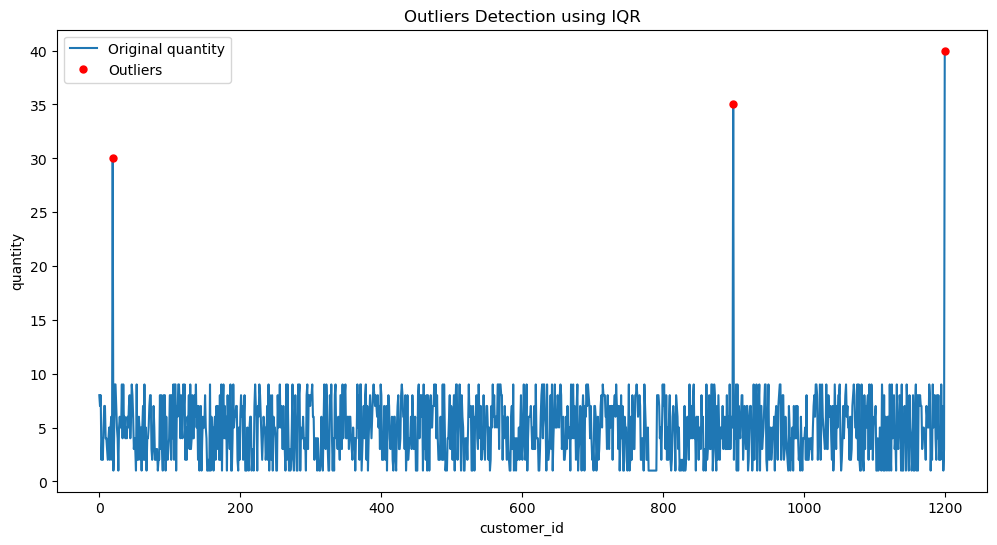

In [46]:
# Calculate Q1, Q3, and IQR for 'quantity' column
Q1 = data['quantity'].quantile(0.25)
Q3 = data['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the IQR method
data['outliers'] = (data['quantity'] < lower_bound) | (data['quantity'] > upper_bound)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data.index, 
         data['quantity'], 
         label='Original quantity')

# Plot outliers
plt.plot(data[data['outliers']].index, 
         data[data['outliers']]['quantity'], 
         'ro', markersize=5, label='Outliers')

plt.xlabel('customer_id')
plt.ylabel('quantity')
plt.title('Outliers Detection using IQR')
plt.legend()
plt.show()

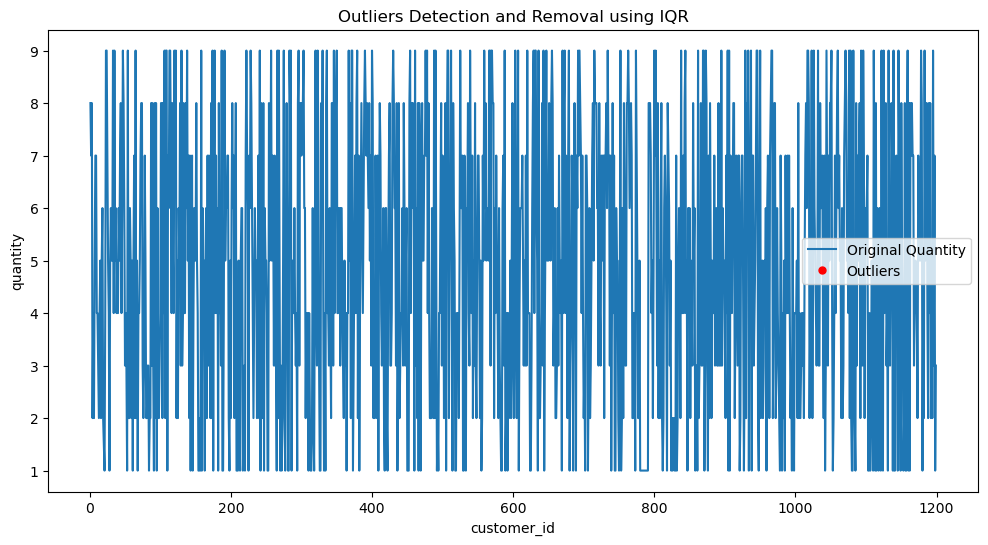

In [47]:
# Remove outliers by filtering based on the lower and upper bounds
data = data[(data['quantity'] >= lower_bound) & (data['quantity'] <= upper_bound)]

# Recalculate outliers based on the IQR method
data['outliers_iqr'] = (data['quantity'] < Q1 - 1.5 * IQR) | (data['quantity'] > Q3 + 1.5 * IQR)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['customer_id'], 
         data['quantity'], 
         label='Original Quantity')

# Plot the outliers
plt.plot(data[data['outliers_iqr']].customer_id, 
         data[data['outliers_iqr']]['quantity'], 
         'ro', markersize=5, label='Outliers')

plt.xlabel('customer_id')
plt.ylabel('quantity')
plt.title('Outliers Detection and Removal using IQR')
plt.legend()
plt.show()

In [49]:
data.to_csv('clean_data2.csv')

In [51]:
data1= pd.read_csv('clean_data1.csv')
data2= pd.read_csv('clean_data2.csv')

In [54]:
data1.head()

,Unnamed: 0,customer_id,age,gender,income_bracket,marital_status,education_level,occupation,outliers_iqr
0,0,1,56,Other,High,Divorced,Bachelor's,Self-Employed,False
1,1,2,69,Female,Medium,Married,PhD,Unemployed,False
2,2,3,46,Female,Low,Married,Bachelor's,Self-Employed,False
3,3,4,32,Male,Low,Divorced,Master's,Employed,False
4,4,5,60,Female,Low,Divorced,Bachelor's,Employed,False


In [56]:
data2.head()

,Unnamed: 0,customer_id,transaction_id,product_category,quantity,unit_price,payment_method,total_sales,avg_discount_used,after_discount_sales,product_color,product_material,outliers,outliers_iqr
0,0,1,503290,Electronics,8.0,49.72,Credit Card,397.76,0.02,389.8048,Red,Metal,False,False
1,1,2,347796,Groceries,7.0,817.76,Credit Card,5724.32,0.33,3835.2944,Blue,Metal,False,False
2,2,3,493688,Toys,8.0,270.30,Debit Card,2162.40,0.47,1146.0720,Green,Plastic,False,False
3,3,4,861348,Toys,2.0,547.84,Credit Card,1095.68,0.41,646.4512,Blue,Wood,False,False
4,4,5,535835,Clothing,4.0,785.29,Mobile Payment,3141.16,0.22,2450.1048,Red,Metal,False,False


In [58]:
# Perform an inner join to combine the customer and transaction data
unified_data = pd.merge(data1, data2, on="customer_id", how="inner")

# Check the resulting unified dataset
unified_data.head()


,Unnamed: 0_x,customer_id,age,gender,income_bracket,marital_status,education_level,occupation,outliers_iqr_x,Unnamed: 0_y,...,quantity,unit_price,payment_method,total_sales,avg_discount_used,after_discount_sales,product_color,product_material,outliers,outliers_iqr_y
0,0,1,56,Other,High,Divorced,Bachelor's,Self-Employed,False,0,...,8.0,49.72,Credit Card,397.76,0.02,389.8048,Red,Metal,False,False
1,1,2,69,Female,Medium,Married,PhD,Unemployed,False,1,...,7.0,817.76,Credit Card,5724.32,0.33,3835.2944,Blue,Metal,False,False
2,2,3,46,Female,Low,Married,Bachelor's,Self-Employed,False,2,...,8.0,270.30,Debit Card,2162.40,0.47,1146.0720,Green,Plastic,False,False
3,3,4,32,Male,Low,Divorced,Master's,Employed,False,3,...,2.0,547.84,Credit Card,1095.68,0.41,646.4512,Blue,Wood,False,False
4,4,5,60,Female,Low,Divorced,Bachelor's,Employed,False,4,...,4.0,785.29,Mobile Payment,3141.16,0.22,2450.1048,Red,Metal,False,False


In [60]:
unified_data = unified_data.drop(columns=['outliers_iqr_x', 'outliers_iqr_y', 'outliers','Unnamed: 0_x','Unnamed: 0_y'])


In [62]:
unified_data

,customer_id,age,gender,income_bracket,marital_status,education_level,occupation,transaction_id,product_category,quantity,unit_price,payment_method,total_sales,avg_discount_used,after_discount_sales,product_color,product_material
0,1,56,Other,High,Divorced,Bachelor's,Self-Employed,503290,Electronics,8.0,49.72,Credit Card,397.76,0.02,389.8048,Red,Metal
1,2,69,Female,Medium,Married,PhD,Unemployed,347796,Groceries,7.0,817.76,Credit Card,5724.32,0.33,3835.2944,Blue,Metal
2,3,46,Female,Low,Married,Bachelor's,Self-Employed,493688,Toys,8.0,270.30,Debit Card,2162.40,0.47,1146.0720,Green,Plastic
3,4,32,Male,Low,Divorced,Master's,Employed,861348,Toys,2.0,547.84,Credit Card,1095.68,0.41,646.4512,Blue,Wood
4,5,60,Female,Low,Divorced,Bachelor's,Employed,535835,Clothing,4.0,785.29,Mobile Payment,3141.16,0.22,2450.1048,Red,Metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1195,52,Other,Medium,Divorced,High School,Employed,604159,Furniture,9.0,432.10,Credit Card,3888.90,0.04,3733.3440,Blue,Metal
1171,1196,78,Female,Low,Single,High School,Retired,205327,Clothing,3.0,784.99,Debit Card,2354.97,0.04,2260.7712,Red,Metal
1172,1197,69,Male,Medium,Single,Master's,Employed,161158,Furniture,7.0,43.79,Debit Card,306.53,0.06,288.1382,Blue,Wood
1173,1198,32,Male,Medium,Divorced,PhD,Self-Employed,683574,Electronics,1.0,750.89,Debit Card,750.89,0.07,698.3277,Black,Metal


In [64]:
data1.dtypes

Unnamed: 0          int64
customer_id         int64
age                 int64
gender             object
income_bracket     object
marital_status     object
education_level    object
occupation         object
outliers_iqr         bool
dtype: object

In [66]:
data2.dtypes

Unnamed: 0                int64
customer_id               int64
transaction_id            int64
product_category         object
quantity                float64
unit_price              float64
payment_method           object
total_sales             float64
avg_discount_used       float64
after_discount_sales    float64
product_color            object
product_material         object
outliers                   bool
outliers_iqr               bool
dtype: object

In [68]:
unified_data.isnull().sum()

customer_id             0
age                     0
gender                  0
income_bracket          0
marital_status          0
education_level         0
occupation              0
transaction_id          0
product_category        0
quantity                0
unit_price              0
payment_method          0
total_sales             0
avg_discount_used       0
after_discount_sales    0
product_color           0
product_material        0
dtype: int64

In [70]:
unified_data.dtypes

customer_id               int64
age                       int64
gender                   object
income_bracket           object
marital_status           object
education_level          object
occupation               object
transaction_id            int64
product_category         object
quantity                float64
unit_price              float64
payment_method           object
total_sales             float64
avg_discount_used       float64
after_discount_sales    float64
product_color            object
product_material         object
dtype: object

In [82]:
import pandas as pd

# Assuming 'df' is your DataFrame with 'product_category' and 'total_sales' columns
df_filtered = unified_data.groupby('product_category')['total_sales'].sum().reset_index()

# Sort by total sales in descending order
df_filtered = df_filtered.sort_values(by='total_sales', ascending=False)

# Display the result
df_filtered


,product_category,total_sales
3,Groceries,651561.303902
0,Clothing,643527.443902
1,Electronics,597175.223902
4,Toys,579933.640000
2,Furniture,492391.510000


In [87]:
# Assuming 'df' is your DataFrame with 'product_category' and 'total_sales' columns
df_filtered = unified_data.groupby('income_bracket')['total_sales'].sum().reset_index()

# Sort by total sales in descending order
df_filtered = df_filtered.sort_values(by='total_sales', ascending=False)

# Display the result
df_filtered

,income_bracket,total_sales
2,Medium,1.085478e+06
0,High,9.898897e+05
1,Low,8.892217e+05


In [73]:
unified_data.to_csv('unified_data.csv')